<a href="https://colab.research.google.com/github/yanov2708/SMR/blob/main/lab1_statistical_methods_of_object_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import golden
from scipy.optimize import linprog
from scipy.spatial import ConvexHull

# Task 1

Згенерувати N тривимiрних незалежних випадкових векторiв, в яких координати незалежнi,
першi двi координати мають показниковий розподiл з параметром 1, третя координата має
стандартний нормальний розподiл.

In [2]:
N = 1000

# First two coordinates: Exponential distribution with parameter 1
coord1 = np.random.exponential(scale=1, size=N)
coord2 = np.random.exponential(scale=1, size=N)

# Third coordinate: Standard normal distribution
coord3 = np.random.normal(loc=0, scale=1, size=N)

# Combine into a 3D array
random_vectors = np.column_stack((coord1, coord2, coord3))

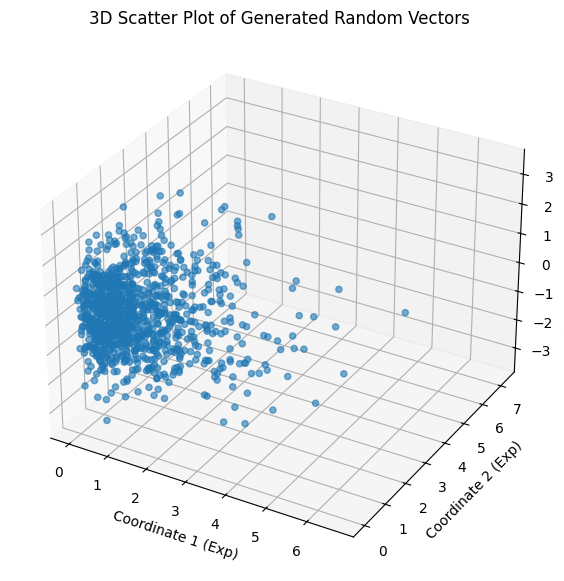

In [4]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(random_vectors[:, 0], random_vectors[:, 1], random_vectors[:, 2], alpha=0.6)

ax.set_xlabel('Coordinate 1 (Exp)')
ax.set_ylabel('Coordinate 2 (Exp)')
ax.set_zlabel('Coordinate 3 (Normal)')
ax.set_title('3D Scatter Plot of Generated Random Vectors')

plt.show()

# Task 2

Реалiзувати алгоритм Козинця пошуку роздiляючого вектора для опуклої оболонки згенерованих векторiв. Алгоритм має працювати для довiльного N.

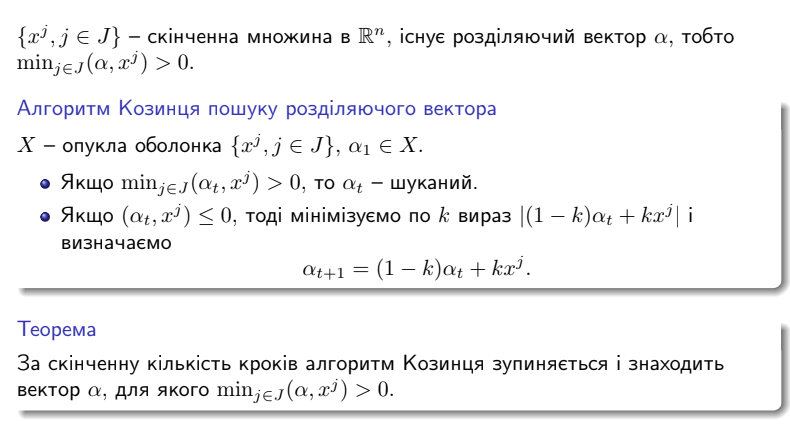

Розділяючий вектор (алгоритм Козинця):
[0.53513693 0.14621157 0.42482357]


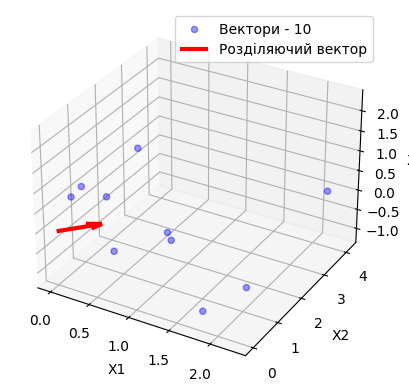

Розділяючий вектор (алгоритм Козинця):
[0.17979599 0.21793224 0.04223068]


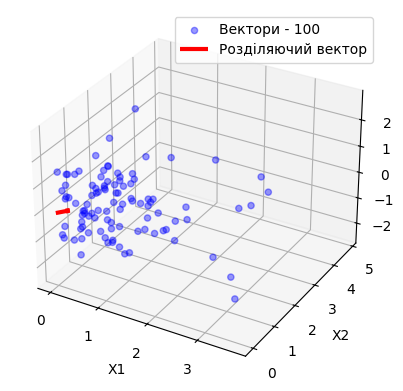

Розділяючий вектор (алгоритм Козинця):
[ 0.05781619  0.07088327 -0.00228401]


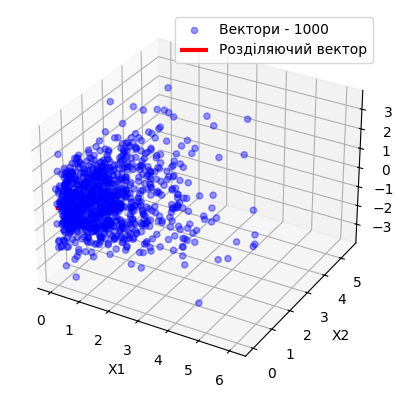

In [24]:
def generate_vectors(count):
    """
    Генерує випадкові 3D вектори із заданими розподілами.
    """
    coord1 = np.random.exponential(scale=1, size=count)
    coord2 = np.random.exponential(scale=1, size=count)
    coord3 = np.random.normal(loc=0, scale=1, size=count)
    return np.column_stack((coord1, coord2, coord3))

def plot_vectors_and_separator(data, separator):
    """
    Візуалізує 3D вектори та розділяючий вектор.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Візуалізація векторів
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='blue', marker='o', label=f'Вектори - {len(data)}', alpha=0.4)

    if separator is not None:
        # Візуалізація розділяючого вектора
        origin = [0, 0, 0]
        ax.quiver(*origin, *separator, color='r', label='Розділяючий вектор', linewidth=3)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

def kozinets_algorithm(x, alpha):
    """
    Реалізація алгоритму Козинця для пошуку розділяючого вектора.

    x: масив точок (кожен рядок - вектор x^j)
    alpha: початковий вектор (numpy масив)

    Повертає розділяючий вектор alpha.
    """
    while True:
        # Обчислюємо мінімальне скалярн добуток
        scalar_products = np.dot(x, alpha)
        min_index = np.argmin(scalar_products)
        min_scalar_product = scalar_products[min_index]

        # Умова зупинки
        if min_scalar_product > 0:
            return alpha  # Розділяючий вектор знайдено

        # Обираємо x^j, для якого скалярний добуток мінімальний
        xj = x[min_index]

        # Визначаємо функцію для мінімізації
        f = lambda k: np.linalg.norm((1 - k) * alpha + k * xj)

        # Знаходимо оптимальне значення k
        k_opt = golden(f)

        # Оновлюємо alpha
        alpha = (1 - k_opt) * alpha + k_opt * xj

def start_experiment(num_vectors):
    """
    Запуск експерименту для алгоритму Козинця.
    """
    x = generate_vectors(num_vectors)

    # Початковий вектор alpha (можна обрати як першу точку)
    alpha_start = x[0]

    # Пошук розділяючого вектора
    alpha_result = kozinets_algorithm(x, alpha_start)

    print("Розділяючий вектор (алгоритм Козинця):")
    print(alpha_result)
    plot_vectors_and_separator(x, alpha_result)

if __name__ == "__main__":
    start_experiment(10)
    start_experiment(100)
    start_experiment(1000)
